# Demonstrating new Designer API

In [1]:
%reload_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import dgym as dg

# load all data
path = '../../dgym-data'

deck = dg.MoleculeCollection.load(
    f'{path}/DSi-Poised_Library_annotated.sdf',
    reactant_names=['reagsmi1', 'reagsmi2', 'reagsmi3']
)

reactions = dg.ReactionCollection.from_json(
    path = f'{path}/All_Rxns_rxn_library_sorted.json',
    smarts_col = 'reaction_string',
    classes_col = 'functional_groups'
)

building_blocks = dg.datasets.disk_loader(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630.sdf')
fingerprints = dg.datasets.fingerprints(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630_atoms.fpb')

import torch
import pyarrow.parquet as pq
table = pq.read_table('../../dgym-data/sizes.parquet')[0]
sizes = torch.tensor(table.to_numpy())

In [204]:
from dgym.envs.designer import Designer, Generator

designer = Designer(
    Generator(building_blocks, fingerprints, sizes),
    reactions,
    cache = True
)

Random molecule from Enamine REAL.

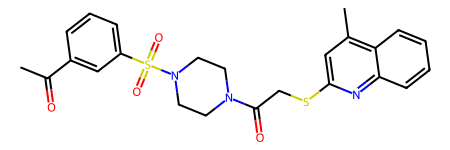

CPU times: user 194 ms, sys: 0 ns, total: 194 ms
Wall time: 19.6 ms


In [417]:
%%time
designer.reset_cache()
res = designer.design(1)[0]
display(res)

Multi-step reaction.

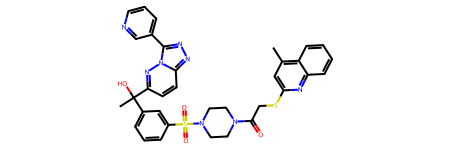

CPU times: user 426 ms, sys: 455 µs, total: 426 ms
Wall time: 43.5 ms


In [418]:
%%time
molecule = designer.design(molecule=res, size=1, method='grow')[0]
display(molecule)

Replace reactants in fragment.

CPU times: user 836 ms, sys: 437 µs, total: 836 ms
Wall time: 90.7 ms


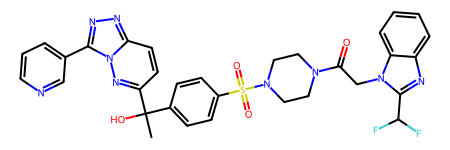

In [437]:
%%time
molecule = designer.design(molecule, 1)[0]
molecule

In [441]:
import json

print(json.dumps(molecule.dump(), indent=4))

{
    "product": "CC(O)(c1ccc(S(=O)(=O)N2CCN(C(=O)Cn3c(C(F)F)nc4ccccc43)CC2)cc1)c1ccc2nnc(-c3cccnc3)n2n1",
    "reaction": "81_Grignard_alcohol",
    "reactants": [
        {
            "product": "CC(=O)c1ccc(S(=O)(=O)N2CCN(C(=O)Cn3c(C(F)F)nc4ccccc43)CC2)cc1",
            "reaction": "13_Carboxylate_and_Amine",
            "reactants": [
                {
                    "product": "O=C(O)Cn1c(C(F)F)nc2ccccc21"
                },
                {
                    "product": "CC(=O)c1ccc(S(=O)(=O)N2CCNCC2)cc1.Cl"
                }
            ]
        },
        {
            "product": "Clc1ccc2nnc(-c3cccnc3)n2n1"
        }
    ]
}
